In [1]:
#Task3

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [20]:
from google.colab import files
uploaded = files.upload()

Saving Copy of kc_house_data.csv to Copy of kc_house_data (1).csv


In [21]:
df = pd.read_csv("Copy of kc_house_data.csv")

In [22]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [24]:
df.duplicated().sum()

0

In [27]:
df = df.drop(['date','id'], axis=1)

In [28]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


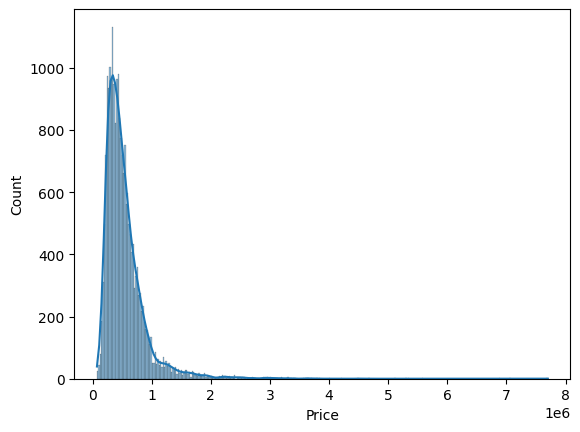

In [31]:
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.show()

In [32]:
x = df.drop('price', axis = 1)
y = df['price']

In [34]:
np.max(df, axis = 0)

,0
price,7.700000e+06
bedrooms,3.300000e+01
bathrooms,8.000000e+00
sqft_living,1.354000e+04
sqft_lot,1.651359e+06
floors,3.500000e+00
waterfront,1.000000e+00
view,4.000000e+00
condition,5.000000e+00
grade,1.300000e+01


In [35]:
np.min(df, axis = 0)

,0
price,75000.0000
bedrooms,0.0000
bathrooms,0.0000
sqft_living,290.0000
sqft_lot,520.0000
floors,1.0000
waterfront,0.0000
view,0.0000
condition,1.0000
grade,1.0000


In [36]:
x_train , x_test , y_train , y_test = train_test_split( x , y , test_size=0.2)

In [37]:
features = ['sqft_lot','sqft_basement', 'sqft_lot15']

scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,-0.228321,1.0,0,0,3,7,1180,-0.658681,1955,0,98178,47.5112,-122.257,1340,-0.260715
1,538000.0,3,2.25,2570,-0.189885,2.0,0,0,3,7,2170,0.245141,1951,1991,98125,47.7210,-122.319,1690,-0.187868
2,180000.0,2,1.00,770,-0.123298,1.0,0,0,3,6,770,-0.658681,1933,0,98028,47.7379,-122.233,2720,-0.172375
3,604000.0,4,3.00,1960,-0.244014,1.0,0,0,5,7,1050,1.397515,1965,0,98136,47.5208,-122.393,1360,-0.284522
4,510000.0,3,2.00,1680,-0.169653,1.0,0,0,3,8,1680,-0.658681,1987,0,98074,47.6168,-122.045,1800,-0.192849


In [38]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(x_test)
y_pred

array([ 516506.21610451,  218761.37992529,  411074.39846386, ...,
        438633.50981771, 1242294.79828519,  376438.78981452])

In [40]:
print("Absloute error",mean_absolute_error(y_test,y_pred))
print("Squared error",mean_squared_error(y_test,y_pred))
print("root mean Squared error",np.sqrt(mean_squared_error(y_test,y_pred)))

Absloute error 126660.33350864767
Squared error 38761529369.44867
root mean Squared error 196879.47930002422


In [42]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test)) #r2

0.6979752471246828
0.7057513249101128
